# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
#! pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
city_lats=[]
city_lngs = []


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lats.append(lat_lng[0])
        city_lngs.append(lat_lng[1])
city_lat_lngs=zip(city_lats,city_lngs)
city_lat_lngs=list(city_lat_lngs)
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric"
#url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=weather_api_key"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url +"&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto leguizamo
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | hofn
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | calama
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | paamiut
Processing Record 11 of Set 1 | lufilufi
Processing Record 12 of Set 1 | jumla
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | poum
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | nemuro
Processing Record 19 of Set 1 | benjamin aceval
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto leguizamo,-0.1934,-74.7819,21.77,98,100,1.16,CO,1676081253
1,hobart,-42.8794,147.3294,22.37,67,75,4.63,AU,1676080779
2,rikitea,-23.1203,-134.9692,26.53,75,100,7.85,PF,1676081254
3,hofn,64.2539,-15.2082,2.82,81,100,1.15,IS,1676081255
4,mahebourg,-20.4081,57.7000,26.25,74,7,4.28,MU,1676081256


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto leguizamo,-0.1934,-74.7819,21.77,98,100,1.16,CO,1676081253
1,hobart,-42.8794,147.3294,22.37,67,75,4.63,AU,1676080779
2,rikitea,-23.1203,-134.9692,26.53,75,100,7.85,PF,1676081254
3,hofn,64.2539,-15.2082,2.82,81,100,1.15,IS,1676081255
4,mahebourg,-20.4081,57.7000,26.25,74,7,4.28,MU,1676081256


In [8]:
import datetime 

In [9]:



date_value = pd.to_datetime(city_data_df["Date"],unit="s").dt.strftime("%Y-%m-%d")[0]
date_value

'2023-02-11'

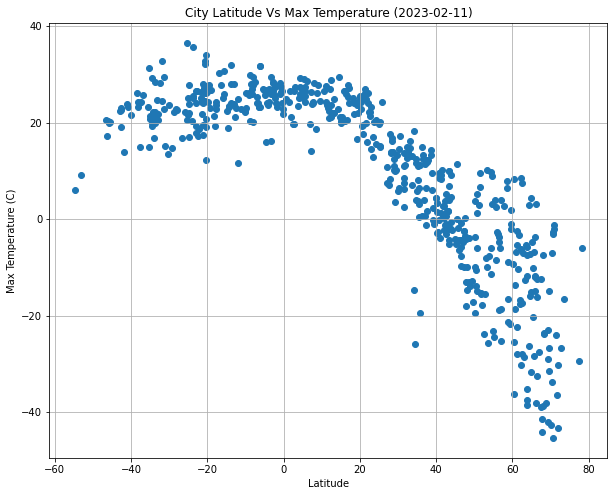

In [10]:
plt.figure(figsize=(10,8))


plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude Vs Max Temperature ({date_value})")

plt.grid()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

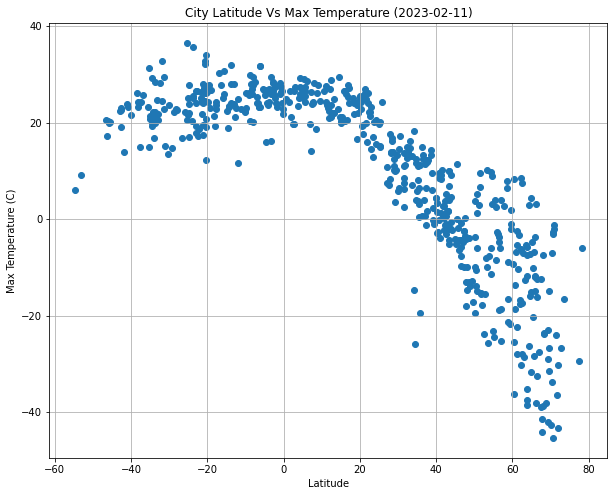

In [11]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,8))


plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude Vs Max Temperature ({date_value})")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

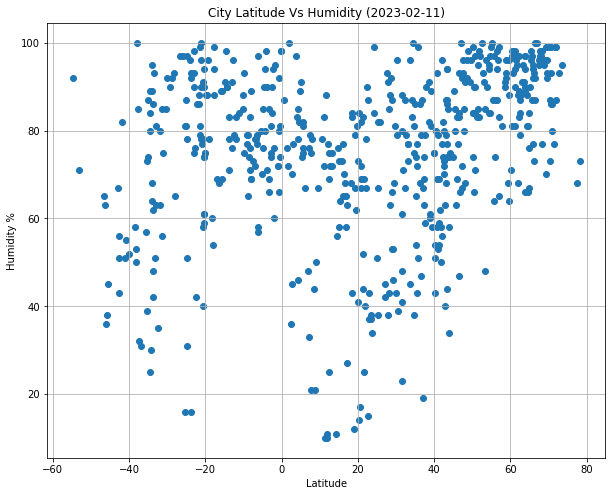

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,8))


plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude Vs Humidity ({date_value})")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

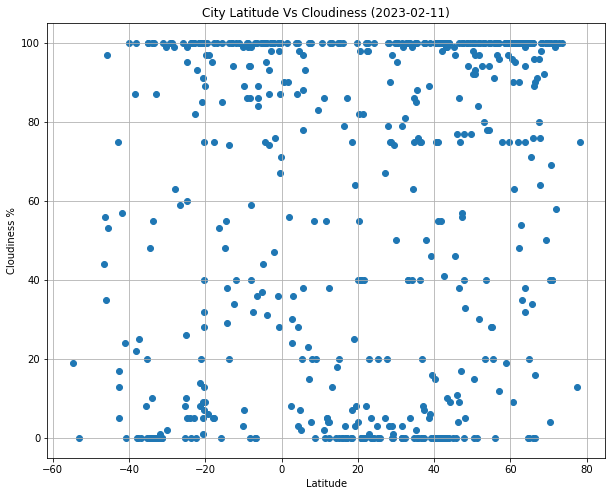

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,8))


plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f"City Latitude Vs Cloudiness ({date_value})")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

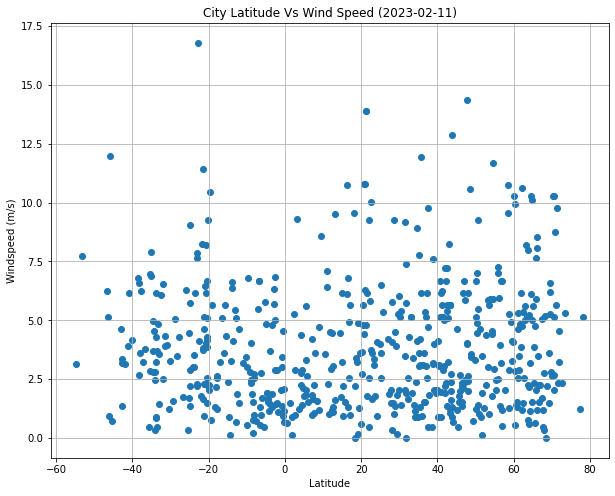

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,8))


plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Windspeed (m/s)")
plt.title(f"City Latitude Vs Wind Speed ({date_value})")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0].copy()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hofn,64.2539,-15.2082,2.82,81,100,1.15,IS,1676081255
8,paamiut,61.9940,-49.6678,-17.53,88,75,3.88,GL,1676081257
10,jumla,29.2747,82.1838,3.59,46,0,1.81,NP,1676080984
11,barrow,71.2906,-156.7887,-23.99,77,100,9.77,US,1676081258
15,nemuro,43.3236,145.5750,-2.02,86,100,5.63,JP,1676081261


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df["Lat"]<0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto leguizamo,-0.1934,-74.7819,21.77,98,100,1.16,CO,1676081253
1,hobart,-42.8794,147.3294,22.37,67,75,4.63,AU,1676080779
2,rikitea,-23.1203,-134.9692,26.53,75,100,7.85,PF,1676081254
4,mahebourg,-20.4081,57.7000,26.25,74,7,4.28,MU,1676081256
5,calama,-22.4667,-68.9333,17.27,42,0,4.12,CL,1676081048


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7449288818146967


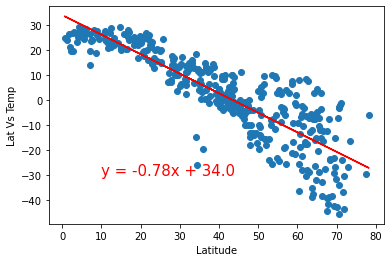

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [34]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], "Lat Vs Temp", (10,-30))


The r-value is: 0.14994350076854718


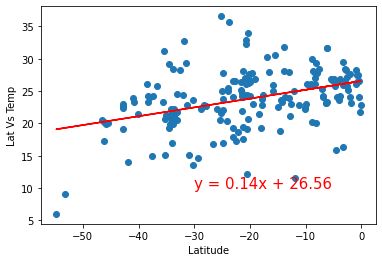

In [49]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], "Lat Vs Temp", (-30,10))

**Discussion about the linear relationship:**  - In the Northern Hemisphere, there is a coorelation of the higher of temperature was, the lower the latitude is.
- In the Southern Hemisphere, there is a very slight coorelation of the higher the temperature, the higher the latitude is. 

### Humidity vs. Latitude Linear Regression Plot

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0].copy()

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hofn,64.2539,-15.2082,2.82,81,100,1.15,IS,1676081255
8,paamiut,61.9940,-49.6678,-17.53,88,75,3.88,GL,1676081257
10,jumla,29.2747,82.1838,3.59,46,0,1.81,NP,1676080984
11,barrow,71.2906,-156.7887,-23.99,77,100,9.77,US,1676081258
15,nemuro,43.3236,145.5750,-2.02,86,100,5.63,JP,1676081261
...,...,...,...,...,...,...,...,...,...
558,hope,33.6671,-93.5916,7.03,96,100,3.38,US,1676081369
560,banda aceh,5.5577,95.3222,25.49,82,88,3.30,ID,1676081565
561,hammerfest,70.6634,23.6821,-2.75,93,40,10.29,NO,1676081565


The r-value is: 0.23890865998645192


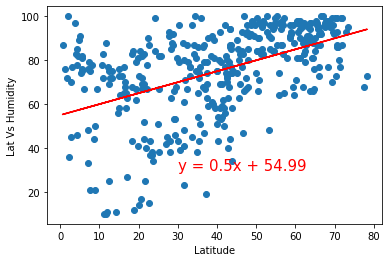

In [51]:
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Lat Vs Humidity", (30,30))

The r-value is: 0.12115320227542434


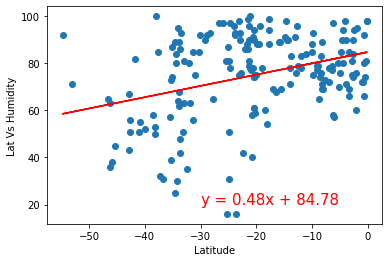

In [52]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Lat Vs Humidity", (-30,20))

**Discussion about the linear relationship:**  In the Northern Hemisphere we see a significant coorelation the higher the latitude, the higher the humdidity is.
In the Souther Hemisphere we see a slight coorelation of the higher the latitude the higher the humidity will be. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10002449293047064


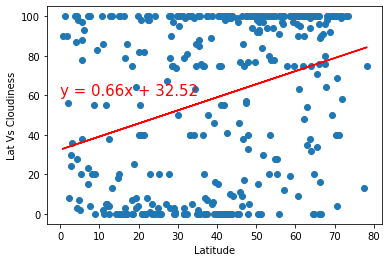

In [46]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Lat Vs Cloudiness", (0,60))


The r-value is: 0.14893504136874333


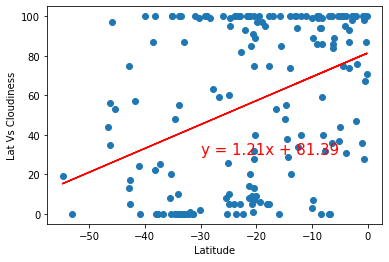

In [47]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Lat Vs Cloudiness", (-30,30))

**Discussion about the linear relationship:** The is a huge coorelation in both the Northern and Southern Hemisphere of the higher the Latitude, the more cloudiness you may experience. We see more a significance in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00953869197693099


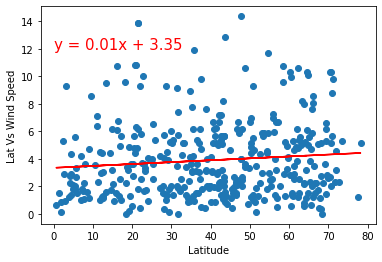

In [53]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Lat Vs Wind Speed", (0,12))

The r-value is: 0.04787984580841091


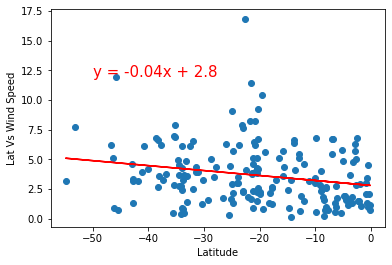

In [54]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Lat Vs Wind Speed", (-50,12))

**Discussion about the linear relationship:** There is no correlation in the Northern Hemisphere with latitude and Windspeed. However, we do see a correlation in the Southern Hemisphere of the higher the Latitude, the lower the wind speed is. 